<h1 style="font-size: 40px; margin-bottom: 0px;">Week 2 Assignment</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<strong><u>Due: Saturday, September 14 at 11:59PM</u></strong>

<strong><u>Total points: 5 pts</u></strong>

<strong><u>Data files associated with this assignment:</u></strong>
<ul>
    <li>Cell_counts_data.csv</li>
    <li>FRENCH_FRIES_STATS.csv</li>
</ul>

<strong><u>To turn in your assignment:</u></strong>
<ol>
    <li>Complete assignment and make sure you have all the outputs requested for the notebook</li>
    <li>Go to your server's file directory and locate your completed notebook file</li>
    <li>Right click and select <strong>Download</strong> to download your completed notebook</li>
    <li>Navigate to lab class <u><strong><a href="https://drive.google.com/drive/folders/1Limmo19dvhZz3qIaDDSnuSrl44yTiHUd?usp=sharing" rel="noopener noreferrer" target="_blank">Google Drive</a></strong></u></li>
    <li>Find your individual folder in the <strong>Assignment Submission folder</strong></li>
    <li>Upload your completed notebook</li>
</ol>

<strong><u>How this assignment will be graded:</u></strong>

You will be graded on whether or not your output is correct. You will also be graded on if your code is able to run without errors. There can be more than one correct way to answer a question. If you find that you prefer to separate your answer for a single question into multiple code cells, feel free to do so.
<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 1</h2>

1 pt

Import the Cell_counts_data.csv file, assign it to a variable, and output the first five rows of the table.

Create a bar plot depiciting the means of the dataset and their associated <u>standard deviation</u>.

In [18]:
#import the packages that you'll need
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#load in the data and output a stylized table with just the first 5 rows
cell_counts = pd.read_csv('Cell_counts_data.csv')
cell_counts.head().style

,control_counts,taz_ko_counts
0,79.000000,41.000000
1,104.000000,66.000000
2,110.000000,42.000000
3,98.000000,73.000000
4,135.000000,34.000000


Text(0, 0.5, 'Cell counts')

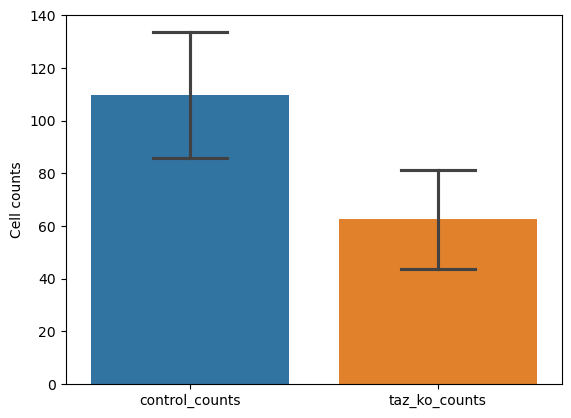

In [20]:
#we can use barplot to plot mean and stddev
sns.barplot(
    data=cell_counts, 
    estimator=np.mean,
    errorbar='sd',
    capsize=0.3
)

plt.ylabel('Cell counts')

<h2>Question 2</h2>

1 pt

Perform a Student's two-tailed t-test using the cell counts data, and output the **t** test statistic and p-value. 

In [21]:
#use the ttest_ind() function from the scipy.stats package
statistics = stats.ttest_ind(cell_counts['control_counts'], cell_counts['taz_ko_counts'], equal_var=True, nan_policy='omit')

#pull pvalue and t statistic from the output and print 
print('p-value is', statistics.pvalue)
print('t statistic is', statistics.statistic)

p-value is 3.798677055495083e-36
t statistic is 15.54636616256626


<h2>Question 3</h2>

1 pt

Import the FRENCH_FRIES_STATISTICS.csv file and assign it to a variable.

In [23]:
#load in data
fries_stats = pd.read_csv('FRENCH_FRIES_STATS.csv')
#checking to see if it loaded in okay
fries_stats.head().style

,McDonald_rating,Nations_rating,McDonalds_fries_count,Nations_fries_count
0,3.000000,4.000000,32.000000,34.000000
1,3.000000,5.000000,37.000000,32.000000
2,2.000000,3.000000,34.000000,31.000000
3,2.000000,3.000000,30.000000,34.000000
4,2.000000,4.000000,31.000000,33.000000


Plot a histogram showing the distribution of how Jack rated McDonald's french fries.

Text(0.5, 1.0, 'McDonalds')

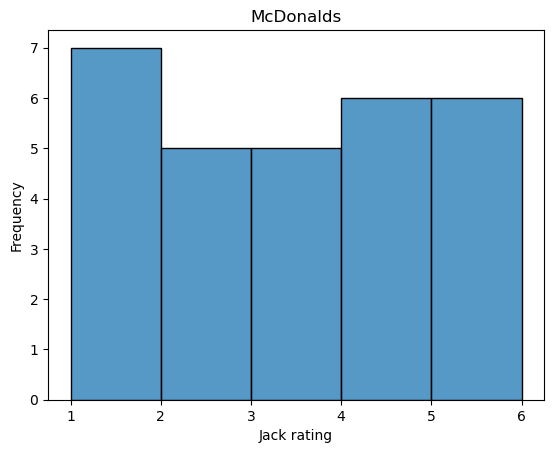

In [24]:
#plot histogram using seaborn's histplot() function
sns.histplot(
    fries_stats['McDonald_rating'], 
    bins=[1,2,3,4,5,6] #specify 5 bins but force how they are generated
)
plt.xlabel('Jack rating')
plt.ylabel('Frequency')
plt.title('McDonalds')

Plot a histogram showing the distribution of how Jack rated Nation's french fries.

Text(0.5, 1.0, 'Nations')

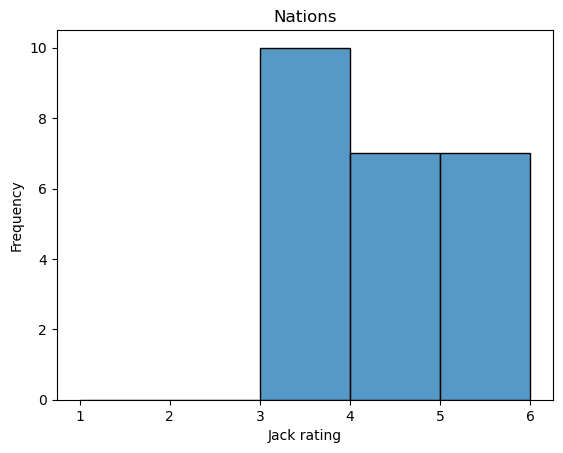

In [25]:
#plot using seaborn.histplot()
sns.histplot(
    fries_stats['Nations_rating'], 
    bins=[1,2,3,4,5,6] #force the exact bins that we want
)
plt.xlabel('Jack rating')
plt.ylabel('Frequency')
plt.title('Nations')

<h2>Question 4</h2>

1 pt

Determine the correct statistical test to use to perform a pair-wise comparison between Jack's ratings for the two chains' french fries. Use that statistical test to determine if there is a significant difference between how Jack rated their french fries.

In [26]:
#perform mannwhitneyu test using scipy.stats package because our data is ordinal and not parametric so cant use t-test
fries_compare = stats.mannwhitneyu(
    fries_stats['McDonald_rating'], 
    fries_stats['Nations_rating'], 
    nan_policy='omit' #we have nan in our data, so we can specify to ignore them when performing the test
)
#set up conditional output based on what our p-value is
if fries_compare.pvalue < 0.05:
    print('statistically significant difference with p-value:', fries_compare.pvalue)
else:
    print('not statistically significant with p-value:', fries_compare.pvalue)

statistically significant difference with p-value: 0.02939421910292284


<h2>Question 5</h2>

1 pt

Plot the distribution of french fries counts for both fast food chains on the same plot. Assign two different colors to each chain's distribution.

Include the following in your plot:
<ul>
    <li>Y axis label</li>
    <li>X axis label</li>
    <li>X-axis that starts from 0</li>
</ul>

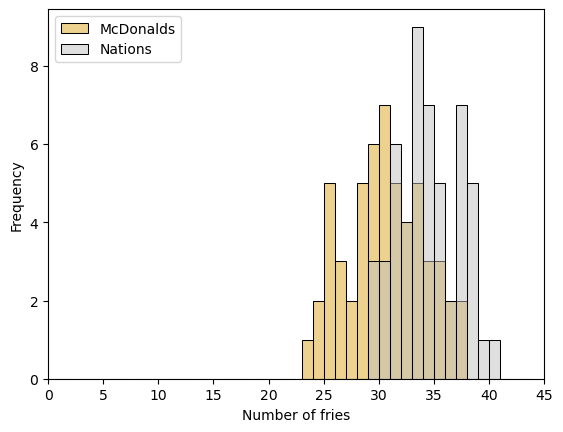

In [27]:
#set up subplot to overlay plots
fig, ax = plt.subplots()
#plot the two histograms
sns.histplot(
    data=fries_stats['McDonalds_fries_count'], #pull out column from dataframe directly while plotting
    bins=np.arange(0, 45, 1), #force a specific bin setup that we like
    label='McDonalds', #add label to our plotted data
    alpha=0.5, #add transparency so we can see the other histogram - setting opacity to 50%
    color='goldenrod' #fancy color :)
)
sns.histplot(
    data=fries_stats['Nations_fries_count'], #pull out column
    bins=np.arange(0, 45, 1), #force bin specification
    label='Nations', #label
    alpha=0.5, #transparency
    color='silver' #color
)

#specify plot characteristics
ax.set_xlim(0, 45)
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of fries')
plt.legend()